# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

<img src="images/banner_black_friday.png">

`Black Friday` (em português, sexta-feira negra) é o dia que inaugura a temporada de compras natalícias com significativas promoções em muitas lojas retalhistas e grandes armazéns. É um dia depois do Dia de Ação de Graças nos Estados Unidos, ou seja, celebra-se no dia seguinte à quarta quinta-feira do mês de novembro. Esta festividade começou nos Estados Unidos e com a ajuda das novas tecnologias e a promoção deste dia por parte das diversas empresas vem-se estendendo pelo resto dos países do mundo.

## Importando as bibliotecas

Vamos importar as principais bibliotecas para análises de dados:
- **Pandas:** é a principal ferramenta para manipulação e análises de dados.
- **Numpy:** é uma poderosa biblioteca Python que é usada principalmente para realizar cálculos em Arrays Multidimensionais.

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# importando o arquivo
df = pd.read_csv("black_friday.csv")

## Análise Exploratória

Vamos conhecer nosso conjunto de dados com a `Análise Exploratória dos dados`, que é uma abordagem à **análise** do conjunto de dados de modo a resumir suas características principais

In [3]:
# Analisando as 3 primeiras linhas
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [4]:
# analisando as 3 últimas linhas
df.tail(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [5]:
# verificando os tipos dos dados de cada variável
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
# verificando se há dados nulos e sua quantidade (%)
df.isnull().sum() / df.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
Purchase                      0.000000
dtype: float64

Podemos constatar que somente **duas variáveis** possuem `dados faltantes` e a variável que mais possui tem aproximadamente **70%**, que é um número alto.

Vamos dar uma olhada no resumo estatístico desse conjunto, nas `variáveis numéricas`.

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Assim como analisamos as variáveis numéricas, podemos olhar também as estatísticas das `variáveis categóricas`.

In [8]:
df.describe(include=np.object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [9]:
def q1():
    # veficando q quantidade de linhas e colunas
    dimensoes = df.shape
    
    # retornando o resultado
    return dimensoes

# executando a função
q1()

(537577, 12)

Temos 537.577 observações e 12 variáveis

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [10]:
def q2():
    # filtra o gênero que quero analisar
    gender_f = df.Gender == "F"
    
    # filtra o categoria da idade buscada
    age = df.Age == "26-35"
    
    # juntando para verificar o resultado
    result = len(df[(df.Gender == "F") & (df.Age == "26-35")])
    
    # retornando o resultado
    return result

# executando a função
q2()

49348

Foram 49.348 mulheres entre 26-35 anos.

Aproveitando, vamos dar uma olhada na proporção entre `homens` e `mulheres` e também como é a distribuição das `idades`.

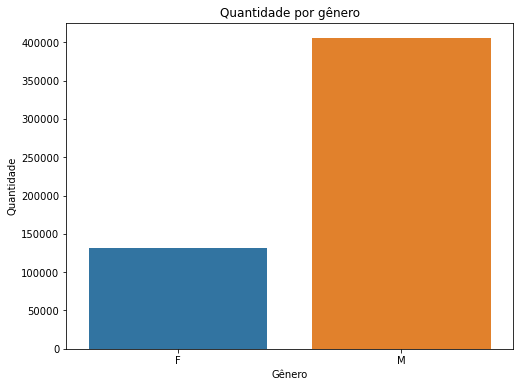

In [11]:
## plotando a quantidade por gênero
# configurando tamanho da área do gráfico
plt.figure(figsize=(8,6))

# criando o plot
sns.countplot(df.Gender)

# inserindo o título
plt.title("Quantidade por gênero")

# alterando eixo x
plt.xlabel('Gênero')

# alterando eixo y
plt.ylabel('Quantidade');

Observamos que há mais homens que mulheres na proporção de `75% de homens` e `25% de mulheres`.

In [12]:
# verificando a proporção por gênero
df.Gender.value_counts(normalize=True)

M    0.754087
F    0.245913
Name: Gender, dtype: float64

Vamos dar uma olhada na distribuição das idades.<br>
Como a idade já está *intervalada* usarei um countplot para analisar, caso tivesse a variável `idade` para cada pessoa, utilizaríamos um histograma.

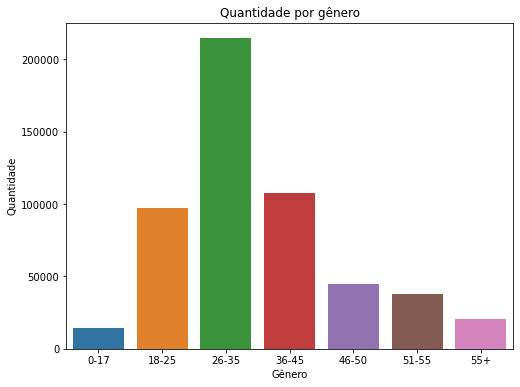

In [13]:
## plotando a quantidade por gênero
# configurando tamanho da área do gráfico
plt.figure(figsize=(8,6))

# criando o plot
ordem_age = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.countplot(df.Age, order=ordem_age)

# inserindo o título
plt.title("Quantidade por gênero")

# alterando eixo x
plt.xlabel('Gênero')

# alterando eixo y
plt.ylabel('Quantidade');

Podemos ver que as pessoas que mais compraram, as idades variam entre `26 à 35 anos`.

Sabemos que um usuário pode comprar mais de um produto, então quantas pessoas de fato compraram?

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [14]:
def q3():
    # verificando os usuários únicos
    usr_unic = df.User_ID.nunique()
    
    # retornando o resultado
    return usr_unic

q3()

5891

In [15]:
print(f'{q3()} pessoas fizeram compras.')

5891 pessoas fizeram compras.


Uma `etapa importante` é checar os **tipos dos dados**, com esse método você pode verificar se uma variável numérica está foi importada com o tipo numérico mesmo ou string, por exemplo

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [16]:
def q4():
    # checando a quantidade de tipos diferentes de dados
    qtd_tipo = len(df.get_dtype_counts())
    
    # retornando o resultado
    return qtd_tipo

q4()

3

In [17]:
print(f'No conjunto de dados constam {q4()} tipos de dados diferentes.\n')
print('E os tipos de dados de cada variável são:')
print('\n',df.dtypes)

No conjunto de dados constam 3 tipos de dados diferentes.

E os tipos de dados de cada variável são:

 User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


Um passo importante quando se trata de `dados faltantes` ou `missing values` é entender os motivos pelos quais esses dados estão ausentes, depois disso fica mais fácil saber qual o método trará melhores resultados para o seu projeto.

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `NaN` etc)? Responda como um único escalar entre 0 e 1.

In [18]:
def q5():
    # definindo a quantidade de entradas
    df_total = df.shape[0]
    
    # definindo as entradas sem na
    df_sem_na = df.dropna().shape[0]
    
    # realizando o cálculo
    resultado = (df_total - df_sem_na) / df_total
    
    # retornando o resultado
    return resultado

q5()

0.6944102891306734

`69%` dos registros possuem ao menos um valor *null*.

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [19]:
def q6():
    # realizando cálculo
    resultado = df.shape[0] - df.dropna().shape[0]
    
    # Retornando o resultado
    return resultado

q6()

373299

A variável com maior número de dados nulos possui `373.299`.

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [20]:
def q7():
    # tirando os dados nulos
    df_sem_nan = df[df['Product_Category_3'].notnull()]
    
    # calculando da moda para a variável mais frequente
    df_moda = df_sem_nan['Product_Category_3'].mode()[0]
    
    # Retornando o resultado
    return df_moda

q7()

16.0

O valor mais frequente de **Product_Category_3** é `16`.

`Normalização` é a técnica frequentemente aplicada como parte da `preparação dos dados` para Machine Learning. O objetivo da normalização é `mudar as colunas com valores numéricos` no conjunto de dados para uma `escala comum`, sem distorcer as diferenças nos ranges de valores.

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [21]:
def q8():
    # selecionando a variável
    x = df.Purchase
    
    # calculo dos dados
    x_nomaliz = ((x - x.min())/(x.max()-x.min()))
    
    # retornando o resultado
    return x_nomaliz.mean()

q8()

0.3847939036269795

A nova média é `0.38`.

A `padronização` é re-escala dos dados numéricos `dentro de uma faixa baseado` em alguns critérios.

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [22]:
def q9():
    standard_scaler = StandardScaler()

    # Aplicando a padronização na coluna Purchase
    x_std = standard_scaler.fit_transform(df[['Purchase']])

    # Criando uma lista que no intervalo [-1,1]
    x_range = [1 if (item>=-1 and item<=1) else 0 for item in x_std ]

    # Retornando o resultado
    return sum(x_range)

q9()

348631

Após a padronização temos `348.631` ocorrências no intervalo entre -1 e 1.

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [23]:
def q10():
    # realizando a consulta para checar
    query = (len(df.query("Product_Category_2 == 'NaN' & Product_Category_3 == 'NaN'")))
    
    # retornando o resultado
    return bool(query)

q10()

True

`Sim`, podemos confirmar que ambas as variáveis `possuem as mesmas observações nulas`.